In [1]:
import pandas as pd
import server.dao as dao
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from tqdm import tqdm_notebook as tqdm
import jieba
import jieba.analyse
import snownlp
import re
import jiagu
import random
import datetime
from collections import Counter

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
print('获取数据...')
comments, users, lyrics, artists = dao.get_data()
print("OK")

获取数据...
OK


In [4]:
print(len(comments), comments[0])
print(len(users), users[0].keys())
print()
print(len(lyrics))

1088102 {'content': '今夜，我的嗓音是被截停的火車，你的名字是俄羅斯漫長的國際線', 'time': 1584952861241}
668797 dict_keys(['user_id', 'level', 'nickname', 'listen_songs', 'vip', 'create_days', 'birthday', 'age', 'gender', 'province', 'city', 'locate'])

802


In [5]:
with open('../data/stop_words.txt', 'r', encoding='utf-8') as f:
    stop_words = f.read().split('\n')

    
def segment(sentence):
    print("正在分词...")
    sentence_depart = jieba.cut(sentence.strip())
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stop_words:
            if word != '\t':
                outstr += word
                outstr += " "
    print('完成！')
    return outstr

## 用户数据可视化

In [6]:
users[0]

{'user_id': 1539466216,
 'level': 7,
 'nickname': '释鑫燚',
 'listen_songs': 1595,
 'vip': '普通',
 'create_days': 975,
 'birthday': -2209017600000,
 'age': 0,
 'gender': '男',
 'province': 530000,
 'city': 530100,
 'locate': '云南省昆明市'}

In [7]:
user_gender = []
user_age = []
user_level = []
user_listen = []
user_vip = []
for user in tqdm(users):
    try:
        user_gender.append(user['gender'])
        user_level.append(user['level'])
        user_vip.append(user['vip'])
        if user['age'] > 0:
            user_age.append(user['age'])
        if user['listen_songs'] > 1000:
            user_listen.append('大于1000')
        elif 500 <= user['listen_songs'] < 1000:
            user_listen.append('500(含)至1000')
        elif 200 <= user['listen_songs'] < 500:
            user_listen.append('200(含)至500')
        elif user['listen_songs'] < 200:
            user_listen.append('少于200')
    except:
        pass
gender_result = Counter(user_gender)
age_result = Counter(user_age)
level_result = Counter(user_level)
listen_result = Counter(user_listen)
vip_result = Counter(user_vip)
print(gender_result)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Counter({'女': 296732, '男': 288964, '未知': 82997})


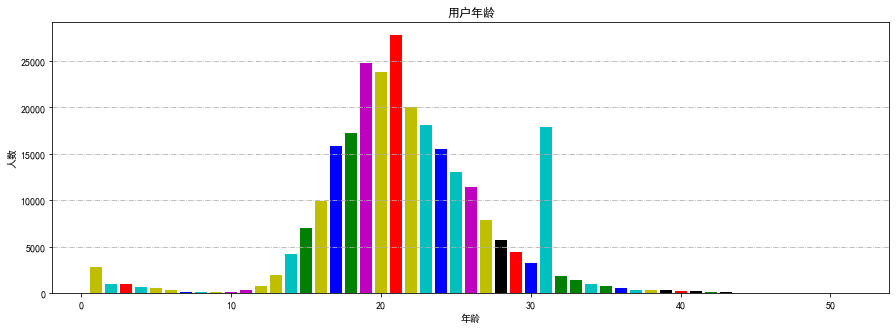

In [10]:
plt.figure(figsize=(15,5))
plt.bar(age_result.keys(), age_result.values(), color=['b','r','g','y','c','m','y','k','c','g','y'])
plt.title('用户年龄')
plt.xlabel('年龄')
plt.ylabel('人数')
plt.grid(linestyle='-.', axis='y')
plt.savefig('./user_age.jpg')

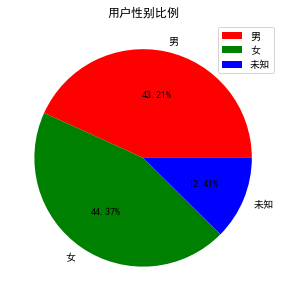

In [11]:
plt.figure(figsize=(5,5))
plt.pie(gender_result.values(), labels=gender_result.keys(), autopct="%1.2f%%", colors=['r','g','b'])
plt.legend()
plt.title("用户性别比例")
plt.savefig('./user_gender.jpg')

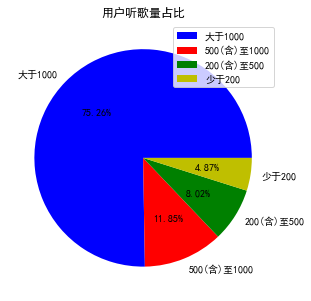

In [12]:
plt.figure(figsize=(5,5))
plt.pie(listen_result.values(), labels=listen_result.keys(), autopct="%1.2f%%", colors=['b','r','g','y','c','m','y','k','c','g','y'])
plt.title('用户听歌量占比')
plt.legend()
plt.savefig('./user_listen.jpg')

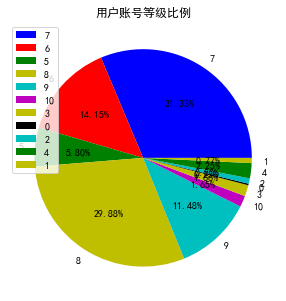

In [13]:
plt.figure(figsize=(5,5))
plt.pie(level_result.values(), labels=level_result.keys(), autopct="%1.2f%%", colors=['b','r','g','y','c','m','y','k','c','g','y'])
plt.legend(loc = 'best')
plt.title("用户账号等级比例")
plt.savefig('./user_level.jpg')

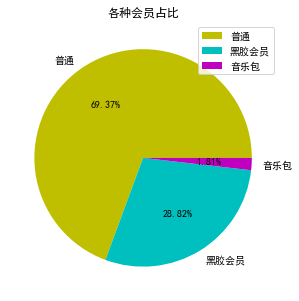

In [14]:
plt.figure(figsize=(5,5))
plt.pie(vip_result.values(), labels=vip_result.keys(), autopct="%1.2f%%", colors=['y','c','m'])
plt.legend()
plt.title("各种会员占比")
plt.savefig('./user_vip.jpg')

## 歌词数据可视化

In [15]:
area = {'南方': 0, '北方': 0, '远方': 0, '家乡': 0, '故乡': 0}
season = {'春天': 0, '夏天': 0, '秋天': 0, '冬天': 0}
lyric_time = {'前天': 0, '昨天': 0, '今天': 0, '明天': 0, '后天': 0}
lyric = []

pattern = re.compile(r'[\u4e00-\u9fa5]*')
for k in tqdm(lyrics.keys()):
    t = re.sub('[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', "",
                         lyrics[k].replace('\n', ' '))
    lyric.append(pattern.search(t).string)
    for line in lyrics[k].split('\n'):
        for word in area.keys():
            if word in line:
                area[word] += 1
        for word in lyric_time.keys():
            if word in line:
                lyric_time[word] += 1
        for word in season.keys():
            if word.replace('天', '') in line:
                season[word] += 1
print(area)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



{'南方': 37, '北方': 45, '远方': 104, '家乡': 41, '故乡': 24}


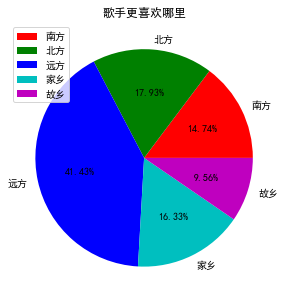

In [16]:
plt.figure(figsize=(5,5))
plt.pie(area.values(), labels=area.keys(), autopct="%1.2f%%", colors=['r','g','b', 'c', 'm'])
plt.legend(loc='upper left')
plt.title("歌手更喜欢哪里")
plt.savefig('./artist_where.jpg')

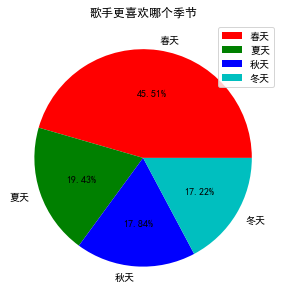

In [17]:
plt.figure(figsize=(5,5))
plt.pie(season.values(), labels=season.keys(), autopct="%1.2f%%", colors=['r','g','b', 'c', 'm'])
plt.legend()
plt.title("歌手更喜欢哪个季节")
plt.savefig('./artist_season.jpg')

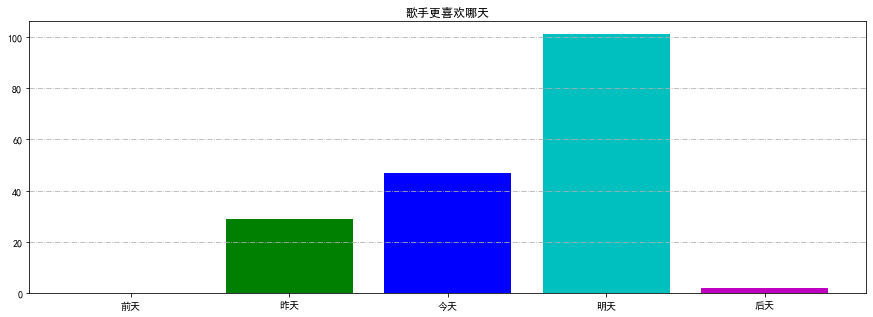

In [18]:
plt.figure(figsize=(15,5))
plt.bar(lyric_time.keys(), lyric_time.values(), color=['r','g','b', 'c', 'm'])
plt.grid(linestyle='-.', axis='y')
plt.title("歌手更喜欢哪天")
plt.savefig('./artist_when.jpg')

In [19]:
all_lyric = ""
for i in lyric:
    all_lyric += i + ' '
text = segment(all_lyric)

Building prefix dict from the default dictionary ...


正在分词...


Dumping model to file cache C:\Users\24518\AppData\Local\Temp\jieba.cache
Loading model cost 0.792 seconds.
Prefix dict has been built successfully.


完成！


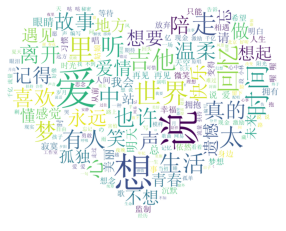

In [21]:
wordcloud = WordCloud(font_path="../data/simsun.ttf",
                      background_color="#fff",
                      mask=plt.imread('../data/background.jpg'),
                      max_words=200,min_font_size=7,random_state=30).generate(text)
image=wordcloud.to_image()
plt.imshow(image)
plt.axis('off')
plt.savefig('./wordcloud')

## 评论可视化

In [18]:
comments[0]

{'content': '今夜，我的嗓音是被截停的火車，你的名字是俄羅斯漫長的國際線', 'time': 1584952861241}

In [19]:
datetime.datetime.fromtimestamp(comments[0]['time'] // 1000)

datetime.datetime(2020, 3, 23, 16, 41, 1)

In [20]:
times = []
contents = []
for comment in tqdm(comments):
    times.append(datetime.datetime.fromtimestamp(comment['time'] // 1000))
    contents.append(comment['content'])

d:\program files\python\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
hours = []
for i in times:
    hours.append(i.hour)
hours_result = Counter(hours)

In [22]:
data = []
for i in sorted(hours_result):
    data.append(hours_result[i])

Text(0, 0.5, '数量')

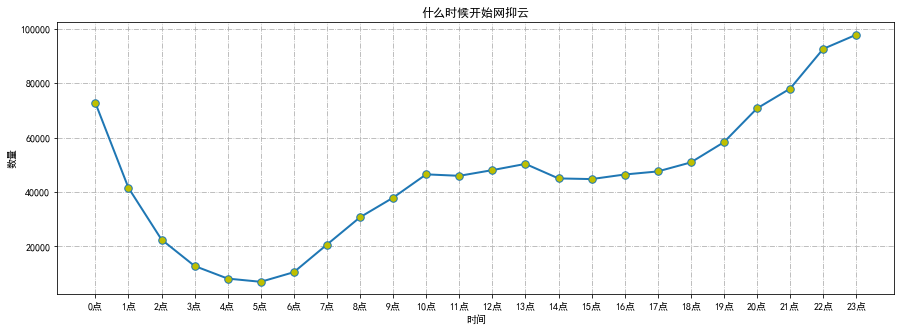

In [23]:
plt.figure(figsize=(15,5))
plt.plot(["{}点".format(i) for i in range(0, 24)], data, linewidth=2, marker='.', markersize=15, markerfacecolor='y')
plt.grid(linestyle='-.')
plt.title("什么时候开始网抑云")
plt.xlabel('时间')
plt.ylabel('数量')

In [24]:
reason = {'亲情': 0, '爱情': 0, '事业': 0, '梦想': 0, '绝症': 0, '过往': 0}
a = ['奶奶', '外婆', '外公', '爷爷', '爸', '妈', '家人', '姐姐', '哥哥']
b = ['未来', '成功', '上岸', '考研', '高考', '中考']
c = ['前任', '女友', '结婚', '男友', '分手', '恋爱', '感情', '两个人', '一个人']
d = ['绝症', '癌症', '晚期', '病魔']
e = ['创业', '老板', '工作', '上班', '同事', '公司', '辞职']
f = ['小时候', '上初中', '年轻的时候', '高中的时候', '初中的时候', '童年', '记忆', '时光']
for i in tqdm(contents):
    for w in a:
        if w in i:
            reason['亲情'] += 1
    for w in b:
        if w in i:
            reason['梦想'] += 1
    for w in c:
        if w in i:
            reason['爱情'] += 1
    for w in d:
        if w in i:
            reason['绝症'] += 1
    for w in e:
        if w in i:
            reason['事业'] += 1
    for w in f:
        if w in i:
            reason['过往'] += 1
print(reason)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



{'亲情': 21276, '爱情': 46070, '事业': 5940, '梦想': 18726, '绝症': 294, '过往': 7670}


Text(0.5, 1.0, '为什么网抑云')

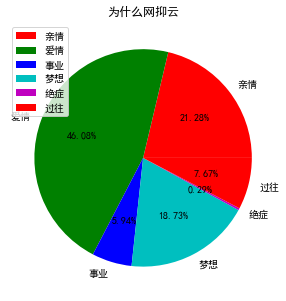

In [25]:
plt.figure(figsize=(5,5))
plt.pie(reason.values(), labels=reason.keys(), autopct="%1.2f%%", colors=['r','g','b', 'c', 'm'])
plt.legend(loc='upper left')
plt.title("为什么网抑云")

In [26]:
random.shuffle(contents)
all_contents = ""
for i in tqdm(contents[:10000]):
    all_contents += i

d:\program files\python\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


正在分词...
完成！


Text(0.5, 1.0, '评论词云')

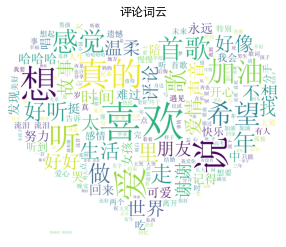

In [27]:
wordcloud = WordCloud(font_path="../data/simsun.ttf",
                      background_color="#fff",
                      mask=plt.imread('../data/background.jpg'),
                      max_words=200,min_font_size=7,random_state=30).generate(segment(all_contents))
image=wordcloud.to_image()
plt.imshow(image)
plt.axis('off')
plt.title("评论词云")